# Conceptualization
* This component takes two CSV files as input
* Those CSV can be generated from a excel file, a SQL or non-SQL database, a power BI enviroment, and so forth

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10000000)

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

FLAG_EXPORT = True

out_path = 'assets/'

In [2]:
raw1 = pd.read_csv (out_path + "dataset.cvs", header=0)
raw1.head()

,timestamp,temp_celsius,pression,precipitation,windspeed_mps
0,2018-01-31 00:00:00-02,21,1011.7,0.0,1.2
1,2018-01-31 01:00:00-02,21,1011.5,0.0,1.5
2,2018-01-31 02:00:00-02,20,1011.0,0.0,1.8
3,2018-01-31 03:00:00-02,20,1010.2,0.0,1.7
4,2018-01-31 04:00:00-02,20,1009.9,0.0,1.8


In [ ]:
raw2 = pd.read_csv (out_path + "dataset2.cvs", header=0)
raw2.head()

# Data integration
* if precipitation<0: precipitation=0

In [15]:
merged = pd.merge (raw1, raw2,how='inner', left_index=True, right_index=True).astype('float')


In [16]:
merged.loc[merged['precipitation']<0, 'precipitation']=0

In [17]:
merged = merged.rename(columns={
    'temp_celsius': 'temperature', 
    'pression': 'pressure', 
    'precipitation': 'precipitation', 
    'windspeed_mps': 'windspeed', 
    'voltage_mean': 'voltage',
    'cosphi_mean': 'cos_phi', 
    'cosphi_std': 'cos_phi_std', 
    'load_factor': 'load_factor', 
    'month_mean': 'month', 
    'dayofweek_mean': 'day_of_week', 
    'hour_mean': 'hour', 
    'p3_std': 'p3_std',
    'p3_mean': 'p3'
})

# Output
* 2 anos de medições em Brasilia, bloco C
* Variables:
  * temperature (float, interpolated. Unit: celsius)
  * pressure (float, interpolated. Unit: hPa)
  * precipitation (float, interpolated. Unit: mm)
  * windspeed (float, interpolated. Unit: mps)
  * voltage (float. Unit: Volts)
  * cos_phi (float $\in [0,1]$. Unit: none)
  * cos_phi_std (float. Unit: none)
  * load_factor (float. Unit: none)
  * month (Int $\in [1,12]$)
  * day_of_week (Int $\in [0,6]$)
  * hour (Int $\in [0,23]$)
  * p3 (Float. Unit: KW)

* Agregados a cada 10min
* to esperando uns 85MB


In [22]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84926 entries, 2018-02-01 00:00:00 to 2019-12-13 23:00:00
Data columns (total 13 columns):
temperature      84926 non-null float64
pressure         84926 non-null float64
precipitation    84926 non-null float64
windspeed        84926 non-null float64
voltage          84926 non-null float64
cos_phi          84926 non-null float64
cos_phi_std      84926 non-null float64
month            84926 non-null float64
hour             84926 non-null float64
day_of_week      84926 non-null float64
p3_std           84926 non-null float64
load_factor      84926 non-null float64
p3               84926 non-null float64
dtypes: float64(13)
memory usage: 11.6 MB


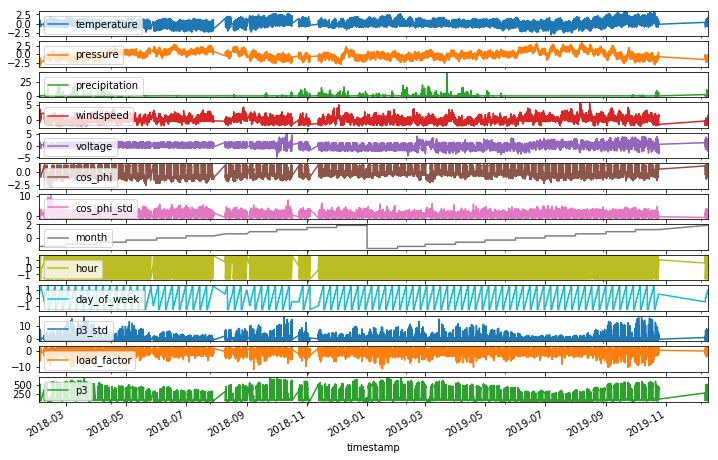

In [24]:
Axis = merged.plot(subplots=True, sharex=True, figsize=(12,8))
for k in range(0,merged.shape[1],1):
    Axis[k].legend(loc='upper left')
if FLAG_EXPORT: plt.savefig(out_path+'graph_temporal_scaled.eps')

In [25]:
merged.to_csv(out_path+'dataset_merged.csv')